# Relatório de Análise 8

## Removendo outliers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [2]:
dados = pd.read_csv('aluguel_residencial.csv', sep=';')

<AxesSubplot:>

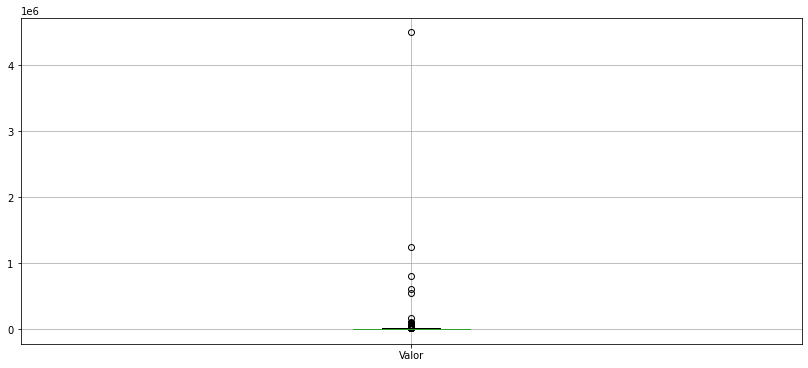

In [3]:
dados.boxplot(['Valor'])

Os outliers:
<img src="Compressed_box-plot.png" width=70%>

In [19]:
valor = dados['Valor']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q1 + 1.5 * IIQ

In [20]:
selecao = (valor >=limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

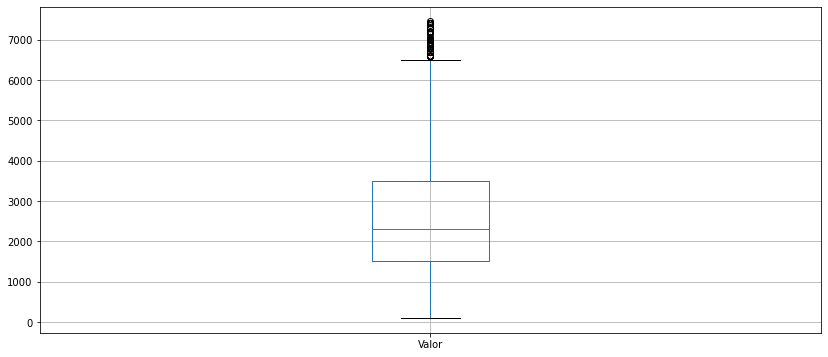

In [21]:
dados_new.boxplot(['Valor'])